# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [197]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [198]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [199]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
      
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | fuling
Processing Record 5 of Set 1 | codrington
Processing Record 6 of Set 1 | chokurdakh
Processing Record 7 of Set 1 | ponta do sol
Processing Record 8 of Set 1 | sindor
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | zyryanka
Processing Record 13 of Set 1 | campbell river
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | gizo
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | talnakh
Processing Record 21 of Set 1 | bathsheba
Processing Record 22 of Set 1 | puerto leg

In [200]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [201]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.7297,-155.0900,23.49,85,0,2.57,US,1674281113
1,punta arenas,-53.1500,-70.9167,10.06,93,75,3.60,CL,1674281189
2,rikitea,-23.1203,-134.9692,26.22,71,47,4.66,PF,1674281189
3,fuling,29.7022,107.3919,6.97,70,100,0.42,CN,1674281190
4,codrington,-38.2667,141.9667,19.52,65,89,6.75,AU,1674281190


In [202]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [203]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hilo,19.7297,-155.0900,23.49,85,0,2.57,US,1674281113
1,punta arenas,-53.1500,-70.9167,10.06,93,75,3.60,CL,1674281189
2,rikitea,-23.1203,-134.9692,26.22,71,47,4.66,PF,1674281189
3,fuling,29.7022,107.3919,6.97,70,100,0.42,CN,1674281190
4,codrington,-38.2667,141.9667,19.52,65,89,6.75,AU,1674281190


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

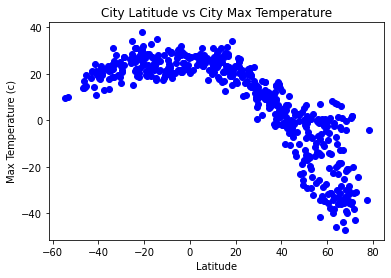

In [204]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker="o", facecolors="blue"),

# Incorporate the other graph properties
plt.title('City Latitude vs City Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (c)')

# Save the figure
plt.savefig("output_data/Fig1.png")


#### Latitude Vs. Humidity

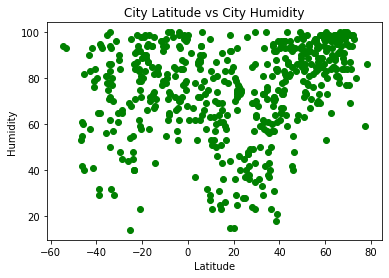

In [205]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker="o", facecolors="green"),

# Incorporate the other graph properties
plt.title('City Latitude vs City Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")


#### Latitude Vs. Cloudiness

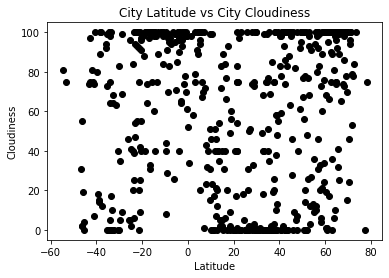

In [206]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker="o", facecolors="k"),

# Incorporate the other graph properties
plt.title('City Latitude vs City Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")


#### Latitude vs. Wind Speed Plot

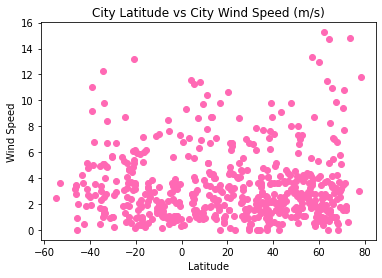

In [207]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker="o", facecolors="hotpink"),

# Incorporate the other graph properties
plt.title('City Latitude vs City Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [208]:
# Define a function to create Linear Regression plots
def create_regression_plot(dataframe, x, y, xlabel, ylabel):
    slope, intercept, r_value, p_value, std_err = linregress(dataframe[x], dataframe[y])
    plt.scatter(dataframe[x], dataframe[y], color='blue')
    plt.plot(dataframe[x], intercept + slope*dataframe[x], 'r')
    plt.xlabel('Temperature (c)')
    plt.ylabel(ylabel)
    plt.suptitle("The R-value is: {}".format(r_value))
    plt.text(0.95, 0.05, 'y = {:.2f}x + {:.2f}'.format(slope, intercept), transform=plt.gca().transAxes, ha='right', fontsize=10, color='green');

In [209]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
#northern_hemi_df = pd.DataFrame(city_data_df)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hilo,19.7297,-155.0900,23.49,85,0,2.57,US,1674281113
3,fuling,29.7022,107.3919,6.97,70,100,0.42,CN,1674281190
5,chokurdakh,70.6333,147.9167,-35.01,99,94,3.44,RU,1674281190
6,ponta do sol,32.6667,-17.1000,16.67,73,18,2.03,PT,1674281190
7,sindor,62.8629,51.8905,-2.39,96,100,3.71,RU,1674281190


In [210]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,punta arenas,-53.1500,-70.9167,10.06,93,75,3.60,CL,1674281189
2,rikitea,-23.1203,-134.9692,26.22,71,47,4.66,PF,1674281189
4,codrington,-38.2667,141.9667,19.52,65,89,6.75,AU,1674281190
12,mataura,-46.1927,168.8643,16.82,42,2,2.81,NZ,1674281191
14,gizo,-8.1030,156.8419,29.22,65,97,1.01,SB,1674281192


###  Temperature vs. Latitude Linear Regression Plot

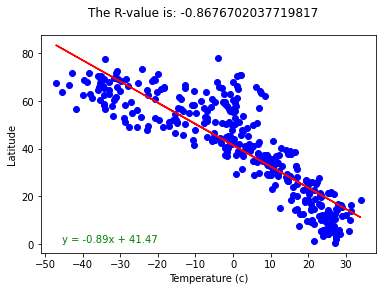

In [212]:
# Linear regression on Northern Hemisphere
# (slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df['Max Temp'],northern_hemi_df['Lat'])
# fit = slope * northern_hemi_df['Max Temp'] + intercept

# plt.scatter(northern_hemi_df['Max Temp'],northern_hemi_df['Lat'], marker="o", facecolors="blue"),
# plt.plot(northern_hemi_df['Max Temp'], fit, 'red')

# # Incorporate the other graph properties
# plt.xlabel('Temperature (c)')
# plt.ylabel('Latitude')
# plt.suptitle("The r-value is: {}".format(r_value))
# plt.text(0.45, 0.25, 'y = {:.2f}x + {:.2f}'.format(slope, intercept), transform=plt.gca().transAxes, ha='right', color= 'red', fontsize=10);

slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Max Temp'], northern_hemi_df['Lat'])
plt.scatter(northern_hemi_df['Max Temp'], northern_hemi_df['Lat'], color='blue')
plt.plot(northern_hemi_df['Max Temp'], intercept + slope*northern_hemi_df['Max Temp'], 'r')
plt.xlabel('Temperature (c)')
plt.ylabel('Latitude')
plt.suptitle("The R-value is: {}".format(r_value))
plt.text(0.35, 0.05, 'y = {:.2f}x + {:.2f}'.format(slope, intercept), transform=plt.gca().transAxes, ha='right', fontsize=10, color='green');

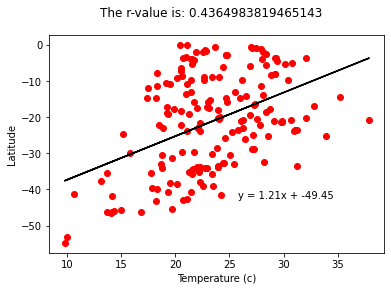

In [213]:
# Linear regression on Southern Hemisphere
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df['Max Temp'],southern_hemi_df['Lat'])
fit = slope * southern_hemi_df['Max Temp'] + intercept

plt.scatter(southern_hemi_df['Max Temp'],southern_hemi_df['Lat'], marker="o", facecolors="red"),
plt.plot(southern_hemi_df['Max Temp'], fit, 'black')

# Incorporate the other graph properties
plt.xlabel('Temperature (c)')
plt.ylabel('Latitude')
plt.suptitle("The r-value is: {}".format(r_value))
plt.text(0.85, 0.25, 'y = {:.2f}x + {:.2f}'.format(slope, intercept), transform=plt.gca().transAxes, ha='right', color= 'black', fontsize=10);

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

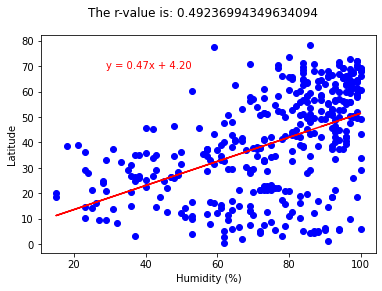

In [214]:
# Northern Hemisphere
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df['Humidity'],northern_hemi_df['Lat'])
fit = slope * northern_hemi_df['Humidity'] + intercept

plt.scatter(northern_hemi_df['Humidity'],northern_hemi_df['Lat'], marker="o", facecolors="blue"),
plt.plot(northern_hemi_df['Humidity'], fit, 'red')

# Incorporate the other graph properties
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.suptitle("The r-value is: {}".format(r_value))
plt.text(0.45, 0.85, 'y = {:.2f}x + {:.2f}'.format(slope, intercept), transform=plt.gca().transAxes, ha='right', color= 'red', fontsize=10);

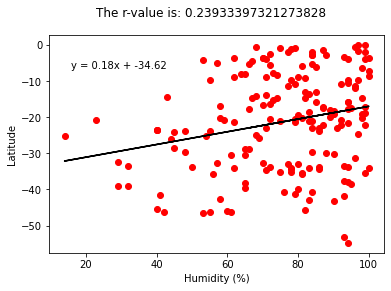

In [215]:
# Southern Hemisphere
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df['Humidity'],southern_hemi_df['Lat'])
fit = slope * southern_hemi_df['Humidity'] + intercept

plt.scatter(southern_hemi_df['Humidity'],southern_hemi_df['Lat'], marker="o", facecolors="red"),
plt.plot(southern_hemi_df['Humidity'], fit, 'black')

# Incorporate the other graph properties
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.suptitle("The r-value is: {}".format(r_value))
plt.text(0.35, 0.85, 'y = {:.2f}x + {:.2f}'.format(slope, intercept), transform=plt.gca().transAxes, ha='right', color= 'black', fontsize=10);

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

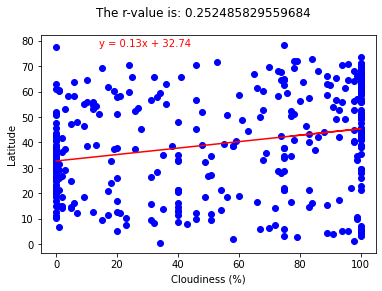

In [216]:
# Northern Hemisphere
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df['Cloudiness'],northern_hemi_df['Lat'])
fit = slope * northern_hemi_df['Cloudiness'] + intercept

plt.scatter(northern_hemi_df['Cloudiness'],northern_hemi_df['Lat'], marker="o", facecolors="blue"),
plt.plot(northern_hemi_df['Cloudiness'], fit, 'red')

# Incorporate the other graph properties
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.suptitle("The r-value is: {}".format(r_value))
plt.text(0.45, 0.95, 'y = {:.2f}x + {:.2f}'.format(slope, intercept), transform=plt.gca().transAxes, ha='right', color= 'red', fontsize=10);

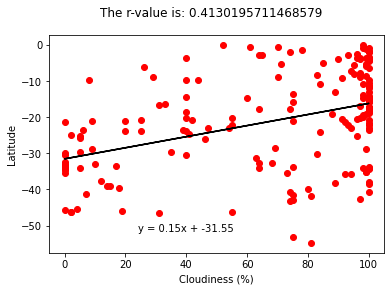

In [217]:
# Southern Hemisphere
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df['Cloudiness'],southern_hemi_df['Lat'])
fit = slope * southern_hemi_df['Cloudiness'] + intercept

plt.scatter(southern_hemi_df['Cloudiness'],southern_hemi_df['Lat'], marker="o", facecolors="red"),
plt.plot(southern_hemi_df['Cloudiness'], fit, 'black')

# Incorporate the other graph properties
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.suptitle("The r-value is: {}".format(r_value))
plt.text(0.55, 0.10, 'y = {:.2f}x + {:.2f}'.format(slope, intercept), transform=plt.gca().transAxes, ha='right', color= 'black', fontsize=10);

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

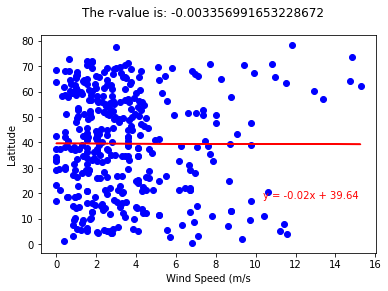

In [218]:
# Northern Hemisphere
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df['Wind Speed'],northern_hemi_df['Lat'])
fit = slope * northern_hemi_df['Wind Speed'] + intercept

plt.scatter(northern_hemi_df['Wind Speed'],northern_hemi_df['Lat'], marker="o", facecolors="blue"),
plt.plot(northern_hemi_df['Wind Speed'], fit, 'red')

# Incorporate the other graph properties
plt.xlabel('Wind Speed (m/s')
plt.ylabel('Latitude')
plt.suptitle("The r-value is: {}".format(r_value))
plt.text(0.95, 0.25, 'y = {:.2f}x + {:.2f}'.format(slope, intercept), transform=plt.gca().transAxes, ha='right', color= 'red', fontsize=10);

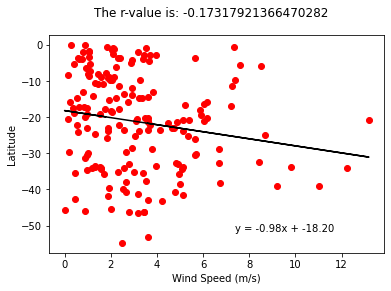

In [219]:
# Southern Hemisphere
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df['Wind Speed'],southern_hemi_df['Lat'])
fit = slope * southern_hemi_df['Wind Speed'] + intercept

plt.scatter(southern_hemi_df['Wind Speed'],southern_hemi_df['Lat'], marker="o", facecolors="red"),
plt.plot(southern_hemi_df['Wind Speed'], fit, 'black')

# Incorporate the other graph properties
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Latitude')
plt.suptitle("The r-value is: {}".format(r_value))
plt.text(0.85, 0.10, 'y = {:.2f}x + {:.2f}'.format(slope, intercept), transform=plt.gca().transAxes, ha='right', color= 'black', fontsize=10);

**Discussion about the linear relationship:** YOUR RESPONSE HERE